In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
db1 = 'blobs_same_zmask10yrs.db'
name1 = 'blob_same'
conn = db.Database(db1, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

metric = metrics.InterNightGapsMetric(mjdCol='mjd')
slicer = slicers.HealpixSlicer(latCol='dec', lonCol='RA', latLonDeg=True)
sql = 'night < 365 and filter="g" or filter="i" or filter="r"'
plotDict= {'percentileClip': 95.}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             runName=name1, plotDict=plotDict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database observations with constraint night < 365 and filter="g" or filter="i" or filter="r" for columns ['mjd', 'night', 'dec', 'RA']
Found 1014521 visits
Running:  ['blob_same_Median_Inter-Night_Gap_night_lt_365_and_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365 and filter="g" or filter="i" or filter="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 13944 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 28.7576  dipole: lon: -81.2486, lat: 67.4775, amp: 29.9
Plotting complete.


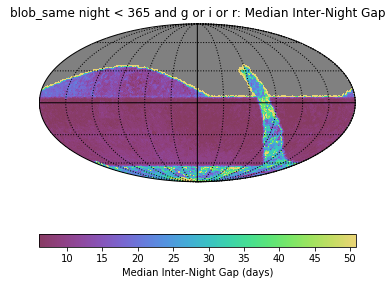

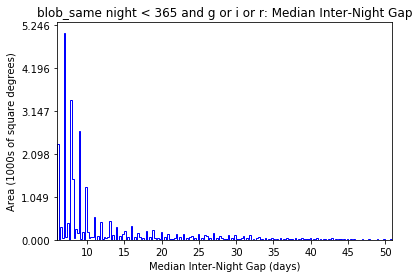

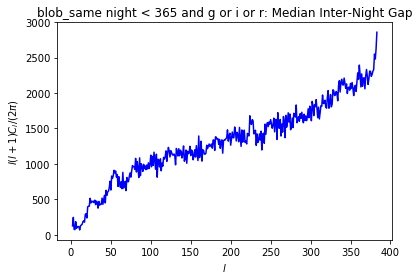

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

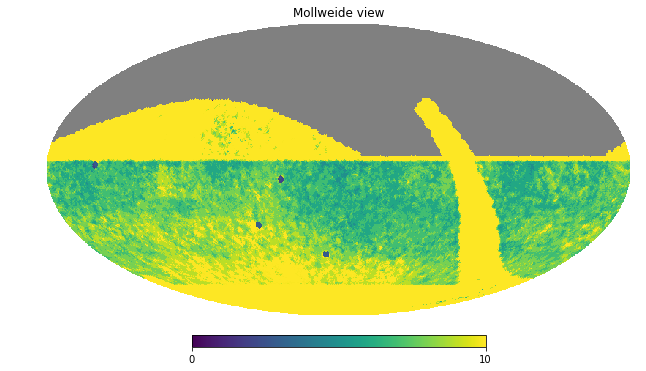

In [10]:
hp.mollview(bundleList[0].metricValues, min=0, max=10)

In [11]:
db1 = 'cad_test_1yrs.db'
name1 = 'cad_test'
conn = db.Database(db1, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Querying database observations with constraint night < 365 and filter="g" or filter="i" or filter="r" for columns ['mjd', 'night', 'dec', 'RA']
Found 106884 visits
Running:  ['blob_same_Median_Inter-Night_Gap_night_lt_365_and_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365 and filter="g" or filter="i" or filter="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1572 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 8.59469  dipole: lon: -165.659, lat: 10.4774, amp: 2.28171
Plotting complete.


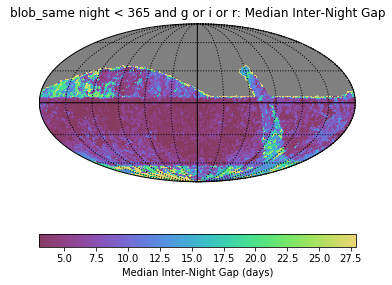

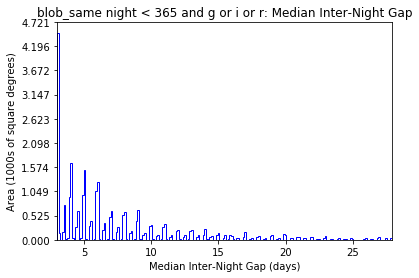

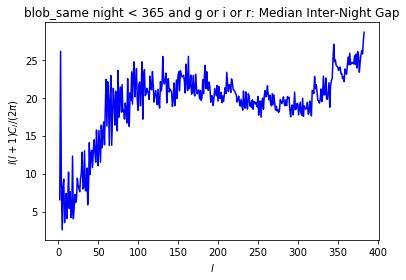

In [12]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

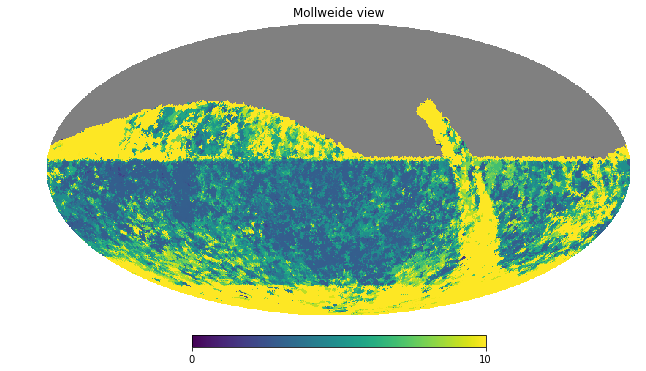

In [15]:
hp.mollview(bundleList[0].metricValues, min=0, max=10)